In [1]:
import pandas as pd
file_path = "./baseline_16_attempt.csv"
df = pd.read_csv(file_path)
df.head()

,n_attempts,acronym,ground_truth,title,total_score
0,0,AAAI,AAAI,Association for the Advancement of Artificial ...,20
1,1,AI,AAAI,Association for the Advancement of Artificial ...,24
2,2,AI,AAAI,Association for the Advancement of Artificial ...,25
3,3,AI4G,AAAI,AI for Good,25
4,4,WEF,AAAI,The World Economic Forum,23


In [2]:
all_titles = set(df['ground_truth'].unique())
print(f"{len(all_titles) = }")
remaining_titles = all_titles.copy()
total_answers = len(all_titles)
correct_answers = 0
p = 1

len(all_titles) = 241


In [28]:
for i in range(16):
    a = df[df['n_attempts'] == i]
    print(f"[{i = }] {((a['acronym'] == a['ground_truth']).sum() / len(a) * 100 ):.2f}%")


[i = 0] 65.16%
[i = 1] 28.28%
[i = 2] 22.95%
[i = 3] 18.03%
[i = 4] 15.98%
[i = 5] 11.89%
[i = 6] 6.56%
[i = 7] 7.38%
[i = 8] 5.33%
[i = 9] 2.05%
[i = 10] 3.28%
[i = 11] 3.69%
[i = 12] 4.10%
[i = 13] 1.23%
[i = 14] 1.64%
[i = 15] 3.69%


In [53]:
print("Pass@K original dataset")
for i in range(16):
    a = df[df['n_attempts'] <= i].copy()
    a['correct'] = a['acronym'] == a['ground_truth']
    # group by ground_truth, calculate the sum of (acronym == ground_truth)
    b = a.groupby('ground_truth')['correct'].sum()
    c = (b >= 1).sum()
    print(f"[Pass@{i}] {(c/ len(all_titles) * 100):.2f}%")



Pass@K original dataset
[Pass@0] 65.56%
[Pass@1] 68.88%
[Pass@2] 71.37%
[Pass@3] 73.03%
[Pass@4] 75.10%
[Pass@5] 75.10%
[Pass@6] 75.52%
[Pass@7] 75.52%
[Pass@8] 75.93%
[Pass@9] 75.93%
[Pass@10] 75.93%
[Pass@11] 76.35%
[Pass@12] 76.35%
[Pass@13] 76.35%
[Pass@14] 76.35%
[Pass@15] 76.35%


ground_truth
AAAI       True
AAAS       True
AADAC      True
AAFES      True
AAODL     False
          ...  
WMANUS     True
WOSM       True
WRAIR      True
WRT       False
WSROC      True
Name: correct, Length: 241, dtype: bool

In [8]:
# For each iteration, get the best previous attempt for each group
df_with_best_prev = pd.DataFrame()
for i in range(16):
    # Get all previous attempts
    prev_attempts = df[df['n_attempts'] < i].copy()
    if not prev_attempts.empty:
        # Group by everything except n_attempts and total_score
        # Keep the row with highest total_score in each group
        best_prev = prev_attempts.sort_values('total_score', ascending=False).groupby(
            ['ground_truth'], 
            as_index=False
        ).first()
        best_prev['iteration'] = i
        df_with_best_prev = pd.concat([df_with_best_prev, best_prev])

print(f"Shape of results: {df_with_best_prev.shape}")
df_with_best_prev = df_with_best_prev.sort_values(by=['ground_truth', 'iteration'], ascending=[True, True])
df_with_best_prev



Shape of results: (3615, 6)


,ground_truth,n_attempts,acronym,title,total_score,iteration
0,AAAI,0,AAAI,Association for the Advancement of Artificial ...,20,1
0,AAAI,1,AI,Association for the Advancement of Artificial ...,24,2
0,AAAI,2,AI,Association for the Advancement of Artificial ...,25,3
0,AAAI,2,AI,Association for the Advancement of Artificial ...,25,4
0,AAAI,3,AI4G,AI for Good,25,5
...,...,...,...,...,...,...
240,WSROC,3,WSYROC,Western Sydney Regional Organisation of Councils,21,11
240,WSROC,3,WSYROC,Western Sydney Regional Organisation of Councils,21,12
240,WSROC,3,WSYROC,Western Sydney Regional Organisation of Councils,21,13
240,WSROC,3,WSYROC,Western Sydney Regional Organisation of Councils,21,14


In [ ]:
best_score = 0
best_result = None
best_score_iteration = 0

llm_proposer = ... 
llm_feedback = ... # GPT-4

for i in range(max_rounds):
    acronym = gen("acronym")
    score = gen("feedback", acronym)
    ...
    if score > best_score:
        best_score = score
        best_result = acronym
        best_score_iteration = i
    
    if i > best_score_iteration + 3:
        break

print(best_result)

In [ ]:
"""Intra-Program"""
threa_shold = 0.1
schedule_token = 64
log_probs_history = []

while True:
    tokens, log_probs = gen(max_tokens=schedule_token, return_log_probs=True)
    log_probs_history.extend(log_probs)
    current_log_prob = ...
    if current_log_prob < threa_shold:
        break
    pass


In [ ]:
"""
Intra-Job == Inter-Program: user don't have control over the job

Job = [Program] --> one dataset
Program = [Branch] / [Iteration] --> one row


System pressure
----
Goodput = efficiency * accuracy

Resource allocation
- Rank different programs (within a job) based on the optimal goodput


"""

In [51]:
for i in range(16):
    df_i = df[df['n_attempts'] == i]
    df_1 = df_i.copy()
    # Drop the rows where rows' title is not in remaining_titles
    df_i = df_i[df_i['ground_truth'].isin(remaining_titles)]
    # Get the top p percent of the rows in terms of total_score
    df_i = df_i.sort_values(by='total_score', ascending=False).head(
        int(len(df_i) * p)
    )
    # print(f"[{i = }] {len(df_i) = }")
    # Update the remaining_titles
    selected_titles = set(df_i['ground_truth'].unique())
    remaining_titles = remaining_titles - set(selected_titles)
    # Record the scores
    num_correct_answers = (df_i['acronym'] == df_i['ground_truth']).sum()
    correct_answers += num_correct_answers
    print(f"[{i = }] {correct_answers} / {total_answers} = {(100 * correct_answers / total_answers):.2f}%")
    i += 1

# Pass@K original dataset

[i = 0] 159 / 241 = 65.98%
[i = 1] 159 / 241 = 65.98%
[i = 2] 159 / 241 = 65.98%
[i = 3] 159 / 241 = 65.98%
[i = 4] 159 / 241 = 65.98%
[i = 5] 159 / 241 = 65.98%
[i = 6] 159 / 241 = 65.98%
[i = 7] 159 / 241 = 65.98%
[i = 8] 159 / 241 = 65.98%
[i = 9] 159 / 241 = 65.98%
[i = 10] 159 / 241 = 65.98%
[i = 11] 159 / 241 = 65.98%
[i = 12] 159 / 241 = 65.98%
[i = 13] 159 / 241 = 65.98%
[i = 14] 159 / 241 = 65.98%
[i = 15] 159 / 241 = 65.98%


### Early Stopping with window

In [72]:
def early_stopping_with_window(df: pd.DataFrame, window_size: int = 3):
    last_length = len(df)
    current_window = (0, window_size)
    
    while current_window[1] <= last_length:
        # if for the previews window_size rows, the acronyms are the same, then stop
        if df['acronym'].iloc[current_window[0]:current_window[1]].nunique() == 1:
            break
        current_window = (current_window[0] + 1, current_window[1] + 1)
    else:
        # Did not reach an agreement
        return None, -1, -1, -1
    stop_index = current_window[1]
    value = df.iloc[stop_index - 1]['acronym']
    score = df.iloc[stop_index - 1]['total_score']
    ground_truth = df.iloc[stop_index - 1]['ground_truth']
    return value, stop_index, score, ground_truth



def early_stopping_with_history(df: pd.DataFrame, history_size: int = 3):
    # major voting
    i = history_size
    import collections
    most_common = collections.Counter(df['acronym'].iloc[:i]).most_common(1)[0]
    if most_common[1] > i / 2:
        return most_common[0], i, df.iloc[i - 1]['total_score'], df.iloc[i - 1]['ground_truth']
    return None, -1, -1, -1



In [75]:

print("Early stopping with window")
from functools import partial
func = early_stopping_with_window
for window_size in range(3, 16):
    correct_answers = 0
    for i in range(total_answers):
        value, stop_index, score, ground_truth = early_stopping_with_window(
            df[i*16:(i+1)*16],
        )
        if value == ground_truth:
            correct_answers += 1
    print(f"[Window size = {window_size}] [{correct_answers = } / {total_answers = }] = {(100 * correct_answers / total_answers):.2f}%")

print("Early stopping with history major voting")
for history_size in range(3, 16, 2):
    correct_answers = 0
    for i in range(total_answers):
        value, stop_index, score, ground_truth = early_stopping_with_history(
            df[i*16:(i+1)*16],
        )
        if value == ground_truth:
            correct_answers += 1
    print(f"[History size = {history_size}] [{correct_answers = } / {total_answers = }] = {(100 * correct_answers / total_answers):.2f}%")


Early stopping with window
[Window size = 3] [correct_answers = 41 / total_answers = 241] = 17.01%
[Window size = 4] [correct_answers = 41 / total_answers = 241] = 17.01%
[Window size = 5] [correct_answers = 41 / total_answers = 241] = 17.01%
[Window size = 6] [correct_answers = 41 / total_answers = 241] = 17.01%
[Window size = 7] [correct_answers = 41 / total_answers = 241] = 17.01%
[Window size = 8] [correct_answers = 41 / total_answers = 241] = 17.01%
[Window size = 9] [correct_answers = 41 / total_answers = 241] = 17.01%
[Window size = 10] [correct_answers = 41 / total_answers = 241] = 17.01%
[Window size = 11] [correct_answers = 41 / total_answers = 241] = 17.01%
[Window size = 12] [correct_answers = 41 / total_answers = 241] = 17.01%
[Window size = 13] [correct_answers = 41 / total_answers = 241] = 17.01%
[Window size = 14] [correct_answers = 41 / total_answers = 241] = 17.01%
[Window size = 15] [correct_answers = 41 / total_answers = 241] = 17.01%
Early stopping with history maj

In [83]:
import math
from collections import defaultdict

def entropy(Plist):
    if len(Plist):
        result = 0
        for x in Plist:
            result += (-x) * math.log(x, 2)
        return result
    else:
        return 0

def norm(Olist):
    s = sum(Olist)
    return [o / s for o in Olist]

def count(Olist):
    x_dict = defaultdict(lambda: 0.0)
    for x in Olist:
        x_dict[x] += 1
    cc = [c for _,c in x_dict.items()]
    #print(cc)
    return cc

# entropy(norm(count(ans_list)))

In [108]:
import collections


for early_exit_percent in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    correct_answers = 0
    early_exit_index = set()
    print(f"Early stopping with entropy {early_exit_percent = }")
    for iter in range(3, 16, 2):
        
        entropies = {}
        for i in range(total_answers):
            if i in early_exit_index:
                continue
            a = df[i*16: (i+1)*16]
            b = a['acronym'].tolist()[:iter]
            c = entropy(norm(count(b)))
            entropies[i] = c
        
        # Find the top p percent of entropy and early exit
        top_p_entropies = sorted(
            entropies.items(), key=lambda x: x[1], reverse=False,
        )[:int(len(entropies) * early_exit_percent)]
        for k, v in top_p_entropies:
            early_exit_index.add(k)
            a = df[k*16: (k+1)*16]
            ground_truth = a.iloc[0]['ground_truth']
            b = a['acronym'].tolist()[:iter]
            
            # calculate correctness
            most_common, most_common_count = collections.Counter(b).most_common(1)[0]
            if most_common == ground_truth:
                correct_answers += 1
            # print(k, v, b, most_common, ground_truth)
    
    # Last iteration
    for i in range(total_answers):
        if i in early_exit_index:
            continue
        a = df[i*16: (i+1)*16]
        ground_truth = a.iloc[0]['ground_truth']
        b = a['acronym'].tolist()[:iter]
        most_common, most_common_count = collections.Counter(b).most_common(1)[0]
        if most_common == ground_truth:
            correct_answers += 1

    
    print(f"[Iter = {iter}] {correct_answers} / {total_answers} = {(100 * correct_answers / total_answers):.2f}%")

    



Early stopping with entropy early_exit_percent = 0.1
[Iter = 15] 83 / 241 = 34.44%
Early stopping with entropy early_exit_percent = 0.2
[Iter = 15] 88 / 241 = 36.51%
Early stopping with entropy early_exit_percent = 0.3
[Iter = 15] 97 / 241 = 40.25%
Early stopping with entropy early_exit_percent = 0.4
[Iter = 15] 101 / 241 = 41.91%
Early stopping with entropy early_exit_percent = 0.5
[Iter = 15] 99 / 241 = 41.08%
Early stopping with entropy early_exit_percent = 0.6
[Iter = 15] 115 / 241 = 47.72%
Early stopping with entropy early_exit_percent = 0.7
[Iter = 15] 122 / 241 = 50.62%
Early stopping with entropy early_exit_percent = 0.8
[Iter = 15] 134 / 241 = 55.60%
Early stopping with entropy early_exit_percent = 0.9
[Iter = 15] 141 / 241 = 58.51%


In [111]:
import collections


for early_exit_percent in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    correct_answers = 0
    early_exit_index = set()
    print(f"Early stopping with entropy {early_exit_percent = } (Pass@entropy exit)")
    for iter in range(3, 16):
        
        entropies = {}
        for i in range(total_answers):
            if i in early_exit_index:
                continue
            a = df[i*16: (i+1)*16]
            b = a['acronym'].tolist()[:iter]
            c = entropy(norm(count(b)))
            entropies[i] = c
        
        # Find the top p percent of entropy and early exit
        top_p_entropies = sorted(
            entropies.items(), key=lambda x: x[1], reverse=False,
        )[:int(len(entropies) * early_exit_percent)]
        for k, v in top_p_entropies:
            early_exit_index.add(k)
            a = df[k*16: (k+1)*16]
            ground_truth = a.iloc[0]['ground_truth']
            b = a['acronym'].tolist()[:iter]
            
            # calculate correctness pass@k
            if ground_truth in b:
                correct_answers += 1
    
    # Last iteration
    for i in range(total_answers):
        if i in early_exit_index:
            continue
        a = df[i*16: (i+1)*16]
        ground_truth = a.iloc[0]['ground_truth']
        b = a['acronym'].tolist()[:iter]
        if ground_truth in b:
            correct_answers += 1

    
    print(f"[Iter = {iter}] {correct_answers} / {total_answers} = {(100 * correct_answers / total_answers):.2f}%")



Early stopping with entropy early_exit_percent = 0.1 (Pass@entropy exit)
[Iter = 15] 179 / 241 = 74.27%
Early stopping with entropy early_exit_percent = 0.2 (Pass@entropy exit)
[Iter = 15] 177 / 241 = 73.44%
Early stopping with entropy early_exit_percent = 0.3 (Pass@entropy exit)
[Iter = 15] 177 / 241 = 73.44%
Early stopping with entropy early_exit_percent = 0.4 (Pass@entropy exit)
[Iter = 15] 177 / 241 = 73.44%
Early stopping with entropy early_exit_percent = 0.5 (Pass@entropy exit)
[Iter = 15] 175 / 241 = 72.61%
Early stopping with entropy early_exit_percent = 0.6 (Pass@entropy exit)
[Iter = 15] 174 / 241 = 72.20%
Early stopping with entropy early_exit_percent = 0.7 (Pass@entropy exit)
[Iter = 15] 173 / 241 = 71.78%
Early stopping with entropy early_exit_percent = 0.8 (Pass@entropy exit)
[Iter = 15] 172 / 241 = 71.37%
Early stopping with entropy early_exit_percent = 0.9 (Pass@entropy exit)
[Iter = 15] 171 / 241 = 70.95%


## Length-norm Entropy 

In [58]:
import pandas as pd
# file = 'length_norm_entropy_7.csv'
file = 'length_norm_entropy_9.csv'
ldf = pd.read_csv(file)
step_size = ldf['n_attempts'].nunique()
ldf['before_feedback_entropy'] = - ldf['before_feedback_entropy']
ldf['after_feedback_entropy'] = - ldf['after_feedback_entropy']
ldf["is_correct"] = ldf["acronym"] == ldf["ground_truth"]
ldf.head(step_size + 1)
print(step_size)


9


In [43]:
correct_dfs = ldf[
    ldf['acronym'] == ldf['ground_truth']
]
wrong_dfs = ldf[
    ldf['acronym'] != ldf['ground_truth']
]

In [44]:
correct_dfs['before_feedback_entropy'].mean(), correct_dfs['before_feedback_entropy'].var()

(0.06410760494513973, 0.005655619435031087)

In [45]:
wrong_dfs['before_feedback_entropy'].mean(), wrong_dfs['before_feedback_entropy'].var()

(0.10985987584587355, 0.013755141895207651)

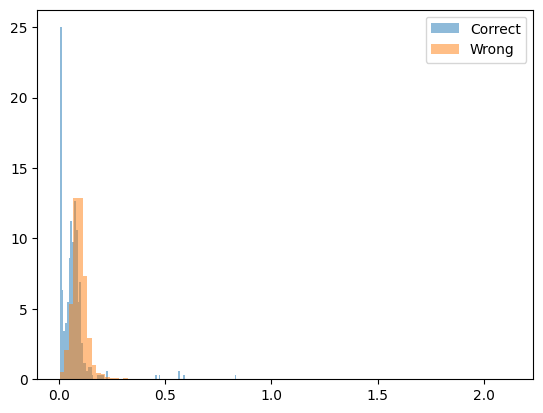

In [48]:
entropy_key_name = "before_feedback_entropy"
# entropy_key_name = "after_feedback_entropy"
import matplotlib.pyplot as plt
plt.hist(correct_dfs[entropy_key_name], bins=100, alpha=0.5, label='Correct', density=True)
plt.hist(wrong_dfs[entropy_key_name], bins=100, alpha=0.5, label='Wrong', density=True)
plt.legend()
plt.show()

In [49]:
def stop_early_entropy(
    df: pd.DataFrame, 
    early_exit_threshold: float = 0.005,
    window_size: int = 3,
):
    history_entropy = []
    ground_truth = df.iloc[0]['ground_truth']
    current_entropy = 0
    is_correct = False
    best_entropy = float('inf')
    best_entropy_index = -1
    for i in range(len(df)):
        # take the ith row
        current_row = df.iloc[i]
        current_entropy = current_row['before_feedback_entropy']
        history_entropy.append(current_entropy)
        
        if current_entropy < best_entropy:
            best_entropy = current_entropy
            best_entropy_index = i
            is_correct = current_row['is_correct']
        if i > best_entropy_index + window_size:
            break
    return best_entropy_index, best_entropy, is_correct, ground_truth


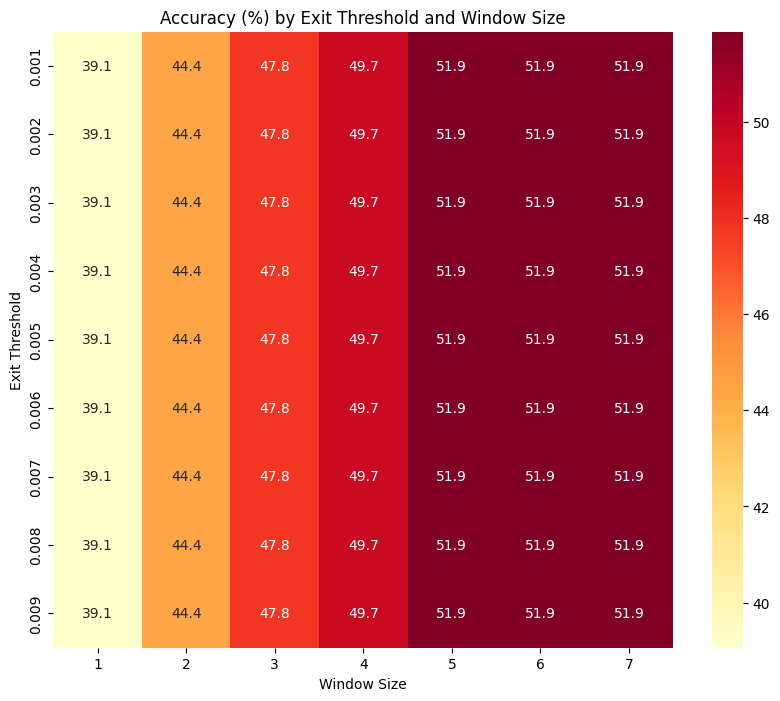

In [57]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

step_size = 7
num_elements = len(ldf) // step_size

# Create lists for the axes
exit_thresholds = [0.001 * i for i in range(1, 10, 1)]
window_sizes = [1, 2, 3, 4, 5, 6, 7]

# Initialize results matrix
results = np.zeros((len(exit_thresholds), len(window_sizes)))

# Collect data
for i, early_exit_threshold in enumerate(exit_thresholds):
    for j, window_size in enumerate(window_sizes):
        correct_answers = 0
        for k in range(num_elements):
            df = ldf[k*step_size: (k+1)*step_size]
            best_entropy_index, best_entropy, is_correct, ground_truth = stop_early_entropy(
                df,
                early_exit_threshold=early_exit_threshold,
                window_size=window_size,
            )
            if is_correct:
                correct_answers += 1
        
        # Store accuracy percentage in results matrix
        results[i,j] = 100 * correct_answers / num_elements

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(results, 
            xticklabels=window_sizes,
            yticklabels=[f'{t:.3f}' for t in exit_thresholds],
            annot=True,
            fmt='.1f',
            cmap='YlOrRd')

plt.xlabel('Window Size')
plt.ylabel('Exit Threshold')
plt.title('Accuracy (%) by Exit Threshold and Window Size')
plt.show()


In [41]:
# Pass@k
def pass_at_k(df: pd.DataFrame, k: int):
    a = df[:k]
    return (a['acronym'] == a['ground_truth']).sum() >= 1


step_size = 7
for k in range(1, 16):
    correct_answers = 0
    for i in range(20):
        df = ldf[i*step_size: (i+1)*step_size]
        if pass_at_k(df, k):
            correct_answers += 1
    print(f"[k = {k}] {correct_answers = } / {20 = } = {(100 * correct_answers / 20):.2f}%")



[k = 1] correct_answers = 15 / 20 = 20 = 75.00%
[k = 2] correct_answers = 17 / 20 = 20 = 85.00%
[k = 3] correct_answers = 17 / 20 = 20 = 85.00%
[k = 4] correct_answers = 17 / 20 = 20 = 85.00%
[k = 5] correct_answers = 17 / 20 = 20 = 85.00%
[k = 6] correct_answers = 17 / 20 = 20 = 85.00%
[k = 7] correct_answers = 17 / 20 = 20 = 85.00%
[k = 8] correct_answers = 17 / 20 = 20 = 85.00%
[k = 9] correct_answers = 17 / 20 = 20 = 85.00%
[k = 10] correct_answers = 17 / 20 = 20 = 85.00%
[k = 11] correct_answers = 17 / 20 = 20 = 85.00%
[k = 12] correct_answers = 17 / 20 = 20 = 85.00%
[k = 13] correct_answers = 17 / 20 = 20 = 85.00%
[k = 14] correct_answers = 17 / 20 = 20 = 85.00%
[k = 15] correct_answers = 17 / 20 = 20 = 85.00%


In [77]:
# # Plot the distribution of the before_feedback_entropy of correct and wrong histograms
# import matplotlib.pyplot as plt
# plt.hist(correct_dfs['before_feedback_entropy'], bins=100, alpha=0.5, label='Correct', density=True)
# plt.hist(wrong_dfs['before_feedback_entropy'], bins=100, alpha=0.5, label='Wrong', density=True)
# plt.legend()
# plt.show()